<a href="https://colab.research.google.com/github/NhatHuy2k2/AI/blob/main/Week6_ClassAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy > /dev/null 2>&1

Power value:  199


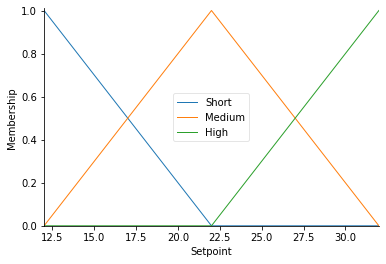

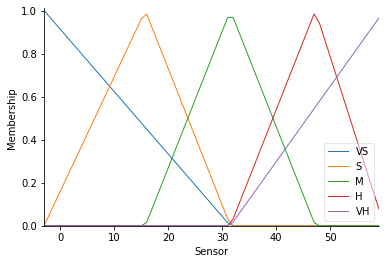

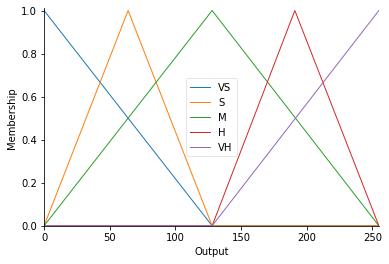

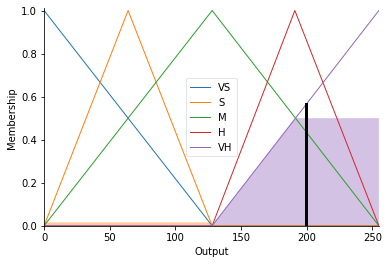

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint  = ctrl.Antecedent(np.arange(12,33,1), 'Setpoint')
Sensor    = ctrl.Antecedent(np.arange(-3,60,1), 'Sensor')
PWM       = ctrl.Consequent(np.arange(0,256,1), 'Output')

# Tạo hàm liên thuộc
# Setpoint
Setpoint['Short']  = fuzz.trimf(Setpoint.universe, [12, 12, 22])
Setpoint['Medium'] = fuzz.trimf(Setpoint.universe, [12, 22, 32])
Setpoint['High']	 = fuzz.trimf(Setpoint.universe, [22, 32, 32])


# Sensor
Sensor['VS']		   = fuzz.trimf(Sensor.universe, [-3, -3, 31.5])
Sensor['S']	       = fuzz.trimf(Sensor.universe, [-3, 15.75, 31.5])
Sensor['M']		     = fuzz.trimf(Sensor.universe, [15.75, 31.5, 47.25])
Sensor['H']	       = fuzz.trimf(Sensor.universe, [31.5, 47.25, 60])
Sensor['VH']	     = fuzz.trimf(Sensor.universe, [31.5, 60, 60])

# PWM
PWM['VS']		   = fuzz.trimf(PWM.universe, [0, 0, 128])
PWM['S']	       = fuzz.trimf(PWM.universe, [0, 64, 128])
PWM['M']		     = fuzz.trimf(PWM.universe, [0, 128, 255])
PWM['H']	       = fuzz.trimf(PWM.universe, [128, 191, 255])
PWM['VH']	     = fuzz.trimf(PWM.universe, [128, 255, 255])

Setpoint.view()
Sensor.view()
PWM.view()


# Tạo luật
rule1  = ctrl.Rule(Sensor['VS'] & Setpoint['Short'] , PWM['VS'])
rule2  = ctrl.Rule(Sensor['VS'] & Setpoint['Medium'] , PWM['VS'])
rule3  = ctrl.Rule(Sensor['VS'] & Setpoint['High'] , PWM['VS'])
rule4  = ctrl.Rule(Sensor['S']  & Setpoint['Short'] , PWM['S'])  
rule5  = ctrl.Rule(Sensor['S']  & Setpoint['Medium'] , PWM['VS'])
rule6  = ctrl.Rule(Sensor['S']  & Setpoint['High'], PWM['VS'])
rule7  = ctrl.Rule(Sensor['M']  & Setpoint['Short'], PWM['M'])
rule8  = ctrl.Rule(Sensor['M']  & Setpoint['Medium'], PWM['S'])
rule9  = ctrl.Rule(Sensor['M']  & Setpoint['High'], PWM['S'])
rule10 = ctrl.Rule(Sensor['H']  & Setpoint['Short'], PWM['VH'])
rule11 = ctrl.Rule(Sensor['H']  & Setpoint['Medium']  , PWM['VH']) 
rule12 = ctrl.Rule(Sensor['H']  & Setpoint['High']  , PWM['VH'])
rule13 = ctrl.Rule(Sensor['VH'] & Setpoint['Short']  , PWM['VH'])
rule14 = ctrl.Rule(Sensor['VH'] & Setpoint['Medium']  , PWM['VH'])
rule15 = ctrl.Rule(Sensor['VH'] & Setpoint['High']  , PWM['VH'])


# PWM_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22])
# Nhận thấy bên trong ctrl.ControlSystem là mảng --> Tạo mảng, lập vòng for để quét( khi quét ta ép các số thành kiểu str)
rule = []
for i in range(1, 16):
    rule.append(locals()["rule" + str(i)])
Output_ctrl = ctrl.ControlSystem(rule)
Output = ctrl.ControlSystemSimulation(Output_ctrl)

Setpoint = 27			# degree Celcius
Sensor = 47			#  degree Celcius


Output.input['Sensor'] = Sensor
Output.input['Setpoint'] = Setpoint


Output.compute()
print ('Power value: ',int(Output.output['Output']))
PWM.view(sim=Output)